# Theory of Regression and Regularization

## Data Science 410

In this notebook we will start our exploration of the mathematical basis of linear statistical models. The emphasis is on the ubiquitous problem of **model over-fitting** or **model over-parameterization**. 

Over-fitting (or over-parameterization) of machine learning models arises in any case where the number of model parameters exceeds the effective dimensions of the feature set. This is most often the result of linear dependency between the features. However, using too complex a model can lead to similar problems. In the extreme case, imagine a model with as many free parameters as training cases. This model might fit the training data perfectly, but will show unstable and unexpected results when used for other data. In machine learning terminology, we say that such an unstable model does not **generalize**. 

Many methods have been developed and continue to be developed to deal with over-parameterized or **ill-posed** machine learning models. In particular, we will explore three methods for stabilizing over-parameterized models: 

- Stepwise regression, wherein features are eliminated from an over-parameterized model in a stepwise fashion. Stepwise regression is the focus of another notebook. 
- Using a mathematical **regularization** technique, known as singular value decomposition, to determine the number of meaningful components for a model. We will explore use of singular value decomposition in this notebook. 
- Using **regularization** methods known as ridge, lasso, and elastic-net regression to stabilize over-parameterized models. We will explore ridge and lasso regression in another notebook.


## Bias-Variance Trade-Off

When applying regularization one must come to terms with the **bias-variance trade-off**. Here are some simple examples of extreme cases:

- If we say that our prediction for all cases is just the mean (or median), we have minimized the variance. The estimate for all cases is the same, so the bias of the estimates is zero. However, there is likely considerable variance in these estimates. 
- On the other hand, we can fit the same data with a kNN model with k=1. The training data will fit this model perfectly, since there  is one model coefficient per training data point. The variance will be high. On the other had the model will have low bias when applied to test data. 

In either case, these extreme models will not generalize well and will exhibit large errors on any independent test data. Any practical model must come to terms with the trade-off between bias and variance to make accurate predictions. 

To better understand this trade-off let's decompose mean square error for a model as follows:

$$\Delta y = E \big[ Y - \hat{f}(X) \big]$$

Where,     
$Y = $ the label vector.  
$X = $ the feature matrix.   
$\hat{f}(x) = $ the trained model.   

Expanding this relation gives us:

$$\Delta y = \big( E[ \hat{f}(X)] - \hat{f}(X) \big)^2 + E \big[ ( \hat{f}(X) - E[ \hat{f}(X)])^2 \big] + \sigma^2\\
\Delta y = Bias^2 + Variance + Irreducible\ Error$$

Regularization will reduce variance, but increase bias. Regularization parameters must be chosen to minimize minimize $\Delta x$. In many cases, this will prove challenging. 

Notice that the **irreducible error** is the limit of model accuracy. Even if we had a perfect model with no bias or variance, the irreducible error is inherent in the data and problem. 

## Linear Algebra Review

Before we get into the details of regularization, let's review some basic linear algebra. For this part of the notebook we will work with the numpy library.

> Note: In python there are a few distinctions to make.  The base python has a variable type called 'Lists'. Lists are just that. They are lists of objects. [5, 'foobar', True, ...]. While we can make a list that contains all numbers: [2.0, 2.0, 2.0], this is not a vector nor matrix.  The package numpy introduces arrays (vectors and matrices) which have the correct associated matrix properties.

> Note: Please be careful using Jupyter Notebook. Jupyter displays arrays the same as lists (you'll see in examples below).  It is even the case that some Numpy functions and objects will interact with lists the same way, but sometimes they do not and it can be frustrating to troubleshoot if they appear the same.  Always read documentation and check the types of your variables with the command type(my_variable).

### Element-Wise Operations

Simple element-wise arithmetic operations can be performed on arrays. 

Let's start by creating two vectors of length 3.

In [1]:
import numpy as np
import pandas as pd
#import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

a = np.array([2]*3)
print(a)
print(type(b))
b = np.arange(1, 4)
print(a)
print(type(b))

[2, 2, 2]
<class 'list'>
[2 2 2]
<class 'numpy.ndarray'>
[1 2 3]
<class 'numpy.ndarray'>


We can perform some basic **element-wise arithmetic operations** on vectors.

In [3]:
print(a + b)
print(a * b)

[3 4 5]
[2 4 6]


The results vectors are both dimension (size) three as are the original vectors.

We can also do element-wise operations on multi-dimensional arrays. The code in the cell below does the following:  
1. Creates 2 3x3 numpy arrays and prints them.
2. The two arrays are added element-wise and the results printed.
3. The two arrays are multiplied element-wise and the results printed.

In [4]:
a2d = np.array([[2]*3, [3]*3])
print('a2d: \n{} \n a-size: {}'.format(a2d, a2d.shape))
b2d = np.reshape(np.arange(1,7), newshape=(2, 3))
print('\nb2d: \n{} \n b-size: {}'.format(b2d, b2d.shape))

# Addition
print('\nAddition: \n {}'.format(a2d + b2d))
# Multiplication
print('\nMultiplication: \n {}'.format(a2d * b2d))

a2d: 
[[2 2 2]
 [3 3 3]] 
 a-size: (2, 3)

b2d: 
[[1 2 3]
 [4 5 6]] 
 b-size: (2, 3)

Addition: 
 [[3 4 5]
 [7 8 9]]

Multiplication: 
 [[ 2  4  6]
 [12 15 18]]


### The Transpose

Any array can be **transposed**. Transposition involves reversing or flipping the order of indices. 

For a 1-d column array or vector, the transpose of a row vector is a column. The transpose of a column vector is a row vector. 

A 2-d array, indexed by row index and then a column index, or $A_{i,j}$. The transpose is then, $A_{j,i}$, with the indices reversed. For example;

$$B_{ji}^T = B_{ij}$$   
where,   
$B$ has dimensions n x m.   
$B^T$ has dimensions m x n. 

It's time for some examples. The code in the cell below does the following: 
1. Attempts to transpose a 1-d numpy array. 
2. Transposes a 1x3 numpy array. 
3. Transposes a 3x3 numpy array. 

In [5]:
print('Try transposing on a vector...')
print(np.transpose(a))
print('Uh oh!  Transpose on a vector doesn\'t do anything...\n')

print('Now reshape a into 1x3 array and then transpose:')
print(np.transpose(np.reshape(a, newshape=(1,3))))
print('\nNow transpose the 2d ad2 matrix:')
print(np.transpose(a2d))

Try transposing on a vector...
[2 2 2]
Uh oh!  Transpose on a vector doesn't do anything...

Now reshape a into 1x3 array and then transpose:
[[2]
 [2]
 [2]]

Now transpose the 2d ad2 matrix:
[[2 3]
 [2 3]
 [2 3]]


### Dot Product and Euclidean Norm

We can also compute the **dot product**, which is also known as the **scalar product** or **inner product** of two vectors of equal length.

$$dot\ product = \Sigma_i^n a_i \cdot b_i$$

Give the dot product a try by executing the code in the cell below.

In [6]:
print('np.dot(a, b) = np.dot({}, {})'.format(a, b))
np.dot(a, b)

np.dot(a, b) = np.dot([2 2 2], [1 2 3])


12

The square root of the inner product of a vector with itself is the length or $l2$ norm of the vector.

$$\parallel a \parallel = length\ of\ vector\ a = \sqrt{a \cdot a}$$


**Your Turn 1:**

Create and execute the code to compute the length or norm of the vector `a` in the cell below.

In [7]:
from math import sqrt
def inner_prod(vec1, vec2):
    # Fill in the following calculation:
    inner_prod_calc = np.dot(vec1,vec2)
    return inner_prod_calc

def l2_norm(my_vec):
    # Fill in the following calculation:
    l2_norm_calc = sqrt(inner_prod(my_vec,my_vec))
    return l2_norm_calc

print('L2 Norm of {} = {}'.format(a, l2_norm(a)))
# Should get 3.464

L2 Norm of [2 2 2] = 3.4641016151377544


But, how can you interpret the dot product? The dot product is the **projection** of one vector on another. This concept can be expressed mathematically:   

$$a \cdot b = \parallel a \parallel \parallel b \parallel cos(\theta)$$   

Rearranging terms we can find the **cosine distance** between two vectors as: 

$$cos(\theta) = \frac{a \cdot b}{\parallel a \parallel \parallel b \parallel}$$

Notice that the inner product of orthogonal vectors is $0$. In this case there is no projection of either vector on the other. 

Run the code in the cell below to see an example.

In [8]:
aa = np.array([1, 0, 0])
bb = np.array([0, 1, 1])
print(inner_prod(aa, bb))

0


### Multiplication of Arrays   

We have already examined element wise arithmetic operations on arrays. But, what other operations can be performed? We have just seen that the inner product, an example of an array-wise operation. We will now examine array-wise multiplication operations.   

As we proceed through this section, notice that the inner product is fundamental to these operations. Efficient computation of an inner product enables efficient computation of other array products. This idea is key to parallel computation for large scale problems.   

To start, execute the code in the cell below to create two matrices, $A$  and $B$ of dimensions $m = 4$ rows by $n = 3$ columns. 

In [9]:
A = np.array([[4]*3]*4) # A has 4 rows and 3 columns
print(A)
B = np.array(np.reshape(np.arange(1, 13), newshape = (4, 3)))
print(B)

[[4 4 4]
 [4 4 4]
 [4 4 4]
 [4 4 4]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


We can multiply a $mxn$ matrix by a vector of length $n$ by taking the **inner product** of each row of the matrix with the vector. The result in a vector of length $m$. Each element of the result can be written at:

$$y_i = \Sigma_j^m A_{ij} \cdot b_j$$

Run the code in the cell below and examine the result. 

In [10]:
np.dot(B, b)

array([14, 32, 50, 68])

So, how do we multiply two matrices? In matrix multiplication each element of the resulting matrix is the inner product of a row by a column. This is known as the **RC rule**. For example, the element $Y_{ij}$ of the result matrix is computed as follows:

$$Y_{ij} = \Sigma_j^m A_{ij} \cdot B_{ji}$$

Notice that the number of columns, $m$, of the first matrix must equal the number of rows of second matrix. And, that the number of rows, $n$ of the first matrix must equal the number of columns of the second matrix. In this case, the two matrices are said to be **conformable**. If the two matrices are not conformable, multiplication is not possible.  

Try by executing the code in the cell bellow.

In [11]:
np.dot(A, B)

ValueError: shapes (4,3) and (4,3) not aligned: 3 (dim 1) != 4 (dim 0)

That operation failed! Evidently these matrices are not conformable. 

But, what if we take the transpose of $B$? If we multiply an $n x m$ matrix by an $m x n$ matrix the result is a **square $n x n$ matrix**. 

**Your Turn 2:** create and execute the code in the cell below to multiply the matrix A by the transpose of B. Use the np.transpose() function to take the transpose of the matrix:

In [12]:
## Fill in missing code below
AtB = np.dot(np.transpose(A) , B)
print('A\'*B = \n{}'.format(AtB))
print('Shape of A\'*B = {}'.format(AtB.shape))

## Fill in missing code below
ABt = np.dot(A, np.transpose(B))
print('\nA*B\' = \n{}'.format(ABt))
print('Shape of A*B\' = {}'.format(ABt.shape))

A'*B = 
[[ 88 104 120]
 [ 88 104 120]
 [ 88 104 120]]
Shape of A'*B = (3, 3)

A*B' = 
[[ 24  60  96 132]
 [ 24  60  96 132]
 [ 24  60  96 132]
 [ 24  60  96 132]]
Shape of A*B' = (4, 4)


### The Identity Matrix and the Inverse

We can define the **identity** matrix having 1s on the diagonal and 0s elsewhere. We can write the identity matrix as follows:

$$I = \begin{bmatrix}
    1  & 0 & 0 & \dots & 0 \\
    0  & 1 & 0 & \dots & 0 \\
    \vdots &\vdots &\vdots & & \vdots \\
    0 & 0 & 0 & \dots & 1
\end{bmatrix}$$

The identity multiplied by any matrix gives that matrix. If $A$ is a rectangular matrix then:

$$A = I \cdot A = A \cdot I$$

In [13]:
I3 = np.eye(3)
I4 = np.eye(4)

print('I (3X3) = \n{}\n'.format(I3))

print('I3 * A\'B (3X3) = \n{}\n'.format(np.dot(I3, AtB)))
print('I4 * AB\' (4X4) = \n{}\n'.format(np.dot(I4, ABt)))

I (3X3) = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

I3 * A'B (3X3) = 
[[ 88. 104. 120.]
 [ 88. 104. 120.]
 [ 88. 104. 120.]]

I4 * AB' (4X4) = 
[[ 24.  60.  96. 132.]
 [ 24.  60.  96. 132.]
 [ 24.  60.  96. 132.]
 [ 24.  60.  96. 132.]]



In principle we can compute an **inverse** of a matrix so that:

$$A = A\\
A = AI \\
A^{-1}A = I$$

To illustrate this concept execute the code in cell below and examine the result.

In [14]:
M = np.array([[1., 4.], [-3., 2.]])
M_inverse = np.linalg.inv(M)

print('M: \n{}'.format(M))

print('\nM_inv = \n{}'.format(M_inverse))

print('\nM_inv * M = \n{}'.format(np.dot(M_inverse, M)))

print('\nM * M_inv = \n{}'.format(np.dot(M, M_inverse)))

M: 
[[ 1.  4.]
 [-3.  2.]]

M_inv = 
[[ 0.14285714 -0.28571429]
 [ 0.21428571  0.07142857]]

M_inv * M = 
[[ 1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00  1.00000000e+00]]

M * M_inv = 
[[ 1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00]]


These operations worked as planned. The product of the inverse with the matrix or vise versa is an identity matrix. 

But, is it always possible to find an inverse of a matrix? Let's try an example of where two of the columns are identical, making them **colinear**. Execute the code in the cell below and see what happens. 

In [15]:
no_inverse = np.array([[1., 1., 3.], [1.,1., 3.],[-3., -3., 4.]])
print('no_inverse: \n{}\n'.format(no_inverse))

print('Try to take the invese:\n')
np.linalg.inv(no_inverse)

no_inverse: 
[[ 1.  1.  3.]
 [ 1.  1.  3.]
 [-3. -3.  4.]]

Try to take the invese:



LinAlgError: Singular matrix

The inverse of a matrix with colinear columns does not exist! This matrix is said to be **singular**. 

### Singular Value Decomposition

In machine learning, we often encounter matrices which cannot be inverted directly. Instead, we need a **decomposition** of $A$ that allows us to compute an **approximation** of $A^{-1}$. One possibility is a method called **singular value decomposition** or **SVD**. The SVD decomposes a matrix as follows:

$$svd(A) = U D V^{\ast}$$

Where,
- $U$ are the orthogonal unit norm **left singular vectors**.
- $V$ are the orthogonal unit norm **right singular vectors**, and $V^{\ast}$ is the **conjugate transpose**. For real-valued $A$ this is just $V^T$.
- $D$ is a diagonal matrix of **singular values**, which are said to define a **spectrum**.

In other words, $A$ is comprised of the linear combination of singular vectors scaled by singular values.

To compute the SVD of a matrix and view the results execute the code in the cell below.

In [16]:
U, s, V = np.linalg.svd(B, full_matrices=False)
print('For matrix B (4x3): \n{}\n'.format(B))
print('U: \n{}\n'.format(U))
print('s: \n{}\n'.format(s))
print('V: \n{}'.format(V))

For matrix B (4x3): 
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

U: 
[[-0.14087668  0.82471435  0.53358462]
 [-0.34394629  0.42626394 -0.8036038 ]
 [-0.54701591  0.02781353  0.00645373]
 [-0.75008553 -0.37063688  0.26356544]]

s: 
[2.54624074e+01 1.29066168e+00 1.38648772e-15]

V: 
[[-0.50453315 -0.5745157  -0.64449826]
 [-0.76077568 -0.05714052  0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]


Examine the singular values, $s$. Notice that the last singular value is effectively 0. We can say that this matrix is **singular** or **rank deficient**. A **full rank** matrix would have all non-zero singular values. 

In this case, $B$ has no exact inverse. Still we should be able to reconstruct the original matrix. The code in the cell below multiples the arrays of the SVD reconstruct the original matrix. Notice that the vector of singular values needs to be coerced to a diagonal matrix of the correct dimensions.  

In [17]:
# Create a diagonal matrix
S = np.diag(s)
print(S)

# Matrix multiply:  U * S * V
B_reconstructed = np.dot(U, np.dot(S, V))

print('B_reconstructed: \n{}'.format(B_reconstructed))
print('B and B_reconstructed are identcal: {}'.format(np.allclose(B, B_reconstructed)))

[[2.54624074e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.29066168e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.38648772e-15]]
B_reconstructed: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
B and B_reconstructed are identcal: True


You can verify that the right and left singular vectors form a orthonormal basis by multiplying them by their transposes. The product of a orthonormal basis will be a identity matrix. Execute the code in the cell below and examine the results:

In [18]:
basis_vec_check1 = np.dot(np.transpose(U),U)
print('Product of U\'U: \n{}'.format(np.round(basis_vec_check1, 2)))

basis_vec_check2 = np.dot(V, np.transpose(V))
print('\nProduct of V V\': \n{}'.format(np.round(basis_vec_check2, 2)))

Product of U'U: 
[[ 1. -0. -0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]

Product of V V': 
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


The result are two identity matrices!

We can view the product of the matrix $A$ with a vector as defining a rotation and scaling. The singular value decomposition of $A$ can be viewed as:

- A first rotation defined by the unit norm singular values $V^{\ast}$.
- A scaling defined by the diagonal singular value matrix $D$.
- A second rotation defined by the unit norm singular values $U$.

This geometric interpretation can be visualized as shown in the figure below.

![](img/SVD.png)

Execute the code in the cell below and examine the rotations and scaling of the initial vector.

In [19]:
# 2-Dimensional Example
D = np.array([[3., 4.], [1., 5.]])
U, s, V = np.linalg.svd(D, full_matrices=False)
e = np.sqrt(1./2.)
u = np.array([e, e])
print('D: \n{}'.format(D))
print('\nu: \n{}'.format(u))
print('Magnitude u: {}'.format(np.sqrt(np.dot(np.transpose(u), u))))

Du = np.dot(D, u)
print('\nProduct D u: \n{}'.format(Du))             
print('Magnitude: {}'.format(np.sqrt(np.dot(np.transpose(Du), Du))))

print('\n')
print('First Rotation:')
u_rot1 = np.dot(np.transpose(V), u)
print(u_rot1)
print('Magnitude: {}'.format(np.sqrt(np.dot(np.transpose(u_rot1), u_rot1))))
print('\n')
print('Scaling:')
u_scaled = np.dot(np.diag(s), u_rot1)
print(u_scaled)
print('Magnitude: {}'.format(np.sqrt(np.dot(np.transpose(u_scaled), u_scaled))))
print('\n')
print('Second Rotation:')
u_rot2 = np.dot(U, u_scaled)
print(u_rot2)
print('Magnitude: {}'.format(np.sqrt(np.dot(np.transpose(u_rot2), u_rot2))))

D: 
[[3. 4.]
 [1. 5.]]

u: 
[0.70710678 0.70710678]
Magnitude u: 1.0

Product D u: 
[4.94974747 4.24264069]
Magnitude: 6.51920240520265


First Rotation:
[0.932458   0.36127839]
Magnitude: 0.9999999999999997


Scaling:
[6.49418233 0.57061013]
Magnitude: 6.519202405202648


Second Rotation:
[4.94974747 4.24264069]
Magnitude: 6.519202405202649


Notice the following about the above results:
- The first rotation gives a vector of the original magnitude.
- The scaling gives a vector of the final magnitude. 
- The second rotation gives the product of the matrix, $D$, and the vector, $u$, which is identical in component values and magnitude after the operations.  

**Your Turn 3:** Do the following:
- Demonstrate that the 4X3 matrix `B` gives the same rotation and scale by multiplying a vector `u = np.array([e, e, e])` where `e = np.sqrt(1./3.)` as multiplying the decomposition, $U \cdot S \cdot V' = B$ by `u`.

In [20]:
# Fill in the code to get the SVD decomposition
U, s, V = np.linalg.svd(B, full_matrices=False)
S = np.diag(s)

# Setup a 3-D rotational vector.
e = np.sqrt(1./3.)
u = np.array([e, e, e])

# Fill in the code to calculate Rotation:
u_rot = np.dot(np.transpose(V), u)
print('\nRotation: {}'.format(u_rot))

# Fill in the code to calculate Scaling:
u_scaled = np.dot(S, u_rot)
print('\nScaled: {}'.format(u_scaled))

# Fill in the code to calculate the last rotation:
u_rot2 = np.dot(U, u_scaled)
print('\nRotation 2: {}'.format(u_rot2))

#------ Are they the same? Caluclate just B*u --------

# Calculate r = B * u:
r = np.dot(B, u)
print('\nr = B * u = {}'.format(r))


Rotation: [-0.96622865  0.10671763 -0.23454965]

Scaled: [-2.46025076e+01  1.37736355e-01 -3.25200208e-16]

Rotation 2: [ 3.57951266  8.52065337 13.46179408 18.40293478]

r = B * u = [ 3.46410162  8.66025404 13.85640646 19.05255888]


###  Pseudo Inverse with SVD

We will be interested in the inverse of a matrix A to solve linear regression.  If a matrix, $A$ has a SVD decomposition, $U \cdot S \cdot V^T$, then the inverse can be calculated as follows:

\begin{align}
A^{-1} &= \left( U \cdot S \cdot V^T  \right)^{-1}
\end{align}

It turns out (which you can verify with numpy operations) that the inverse of the matrices $V$ and $U$ are there transposes. I.e, $U^{-1} = U^T$ and $V^{-1}=V^T$. This property arises since these singular vector matrices are unitary. This gives us:

$$A^{-1} = V \cdot S^{-1} \cdot U^T $$

This representation of $A^{-1}$ is called the **pseudo inverse** also known as the **Moore-Penrose inverse**. It is commonly written as:

$$A^\dagger = V \cdot D^+ \cdot U^T$$

Where,

- $D^+$ is the square diagonal matrix of **inverse singular values** significantly greater than $0$. All other terms are set to $0$.
- $U^T$ is the transpose of the right singular value matrix. 
- $V$ is the left singular value matrix.

The matrix, $A$ may not be of full rank. The types of long and narrow $n x m$ matrices we encounter in machine learning are typically **rank deficient**. A rank deficient matrix arises when there is linear dependency between one or more of the columns. As an example, a matrix with correlated (not necessarily perfectly correlated or colinear) columns is bound to be rank deficient. 

An n x m matrix is considered rank deficient if it has one or more of the $m$ singular values  $d_i  \sim 0.0$. In this case we substitute $0.0$ values on the diagonal of $D^+$ where the singular values $d_i \sim 0.0$. In fact, we want $d_i$ to be significantly greater than $0$. 

To understand what this means, let's try an example. The code in the cell below computes the SVD of a matrix of random numbers chosen from a Normal distribution. The pseudo inverse is computed and multiplied by the original matrix. Execute this code and note the result.

In [21]:
print('Create a matrix of random normal values:')
C = np.array(np.random.randn(3, 3))
print(C)

print('\nCompute the SVD and look at the singular values:')
U, s, V = np.linalg.svd(C, full_matrices=False)
print(s)

print('\nThe inverse matix of singular values:')
D = np.diag(np.reciprocal(s))
print(D)

print('\nThe Pseudo-inverse of the matrix:')
cInv = np.dot(np.dot(np.transpose(V), D), np.transpose(U))
print(cInv)

print('\bThe Pseudo-inverse times the matrix:')
out = np.dot(cInv, C)
print(np.round(out, 2))

Create a matrix of random normal values:
[[-0.54761445 -0.0553718  -0.25232622]
 [-1.3056254  -1.52799767 -1.07346059]
 [-1.28604283 -0.43415742  0.36960452]]

Compute the SVD and look at the singular values:
[2.52281344 1.03730558 0.31110151]

The inverse matix of singular values:
[[0.39638286 0.         0.        ]
 [0.         0.96403607 0.        ]
 [0.         0.         3.21438488]]

The Pseudo-inverse of the matrix:
[[-1.26614327  0.15969796 -0.40056781]
 [ 2.28843111 -0.64719743 -0.31739266]
 [-1.71744412 -0.20456229  0.93898813]]
The Pseudo-inverse times the matrix:
[[ 1. -0. -0.]
 [ 0.  1.  0.]
 [-0. -0.  1.]]


First, notice that the singular values are of similar magnitude and none are near zero. This matrix is not rank deficient. 

Let's try another example. The code in the cell below does the following:

- Creates a $4 X 4$ matrix of numbers drawn from a Normal distribution.
- Substitutes values in the 4th column which are a linear combination of the other three columns.
- Computes the SVD of this matrix.
- Creates the inverse diagonal matrix of singular values.
- Computes the pseudo inverse of the matrix.
- Multiplies the pseudo inverse by the original matrix. 

Execute this code and examine the result.

In [22]:
print('Create a matrix of random normal values:')
C = np.array(np.random.randn(4, 4))
# Rewrite the 4th column as a linear combination of the prior 3 columns
C[:, 3] = 0.4 * C[:, 0] + 0.2 * C[:, 1] + 0.4 * C[:, 2]
print(C)

print('\nCompute the SVD and look at the singular values:')
U, s, V = np.linalg.svd(C, full_matrices=False)
print(s)

print('\nThe inverse matix of singular values:')
D = np.diag(np.reciprocal(s))
print(D)

print('\nThe Pseudo-inverse of the matrix:')
cInv = np.dot(np.dot(np.transpose(V), D), np.transpose(U))
print(cInv)

print('\nThe Pseudo-inverse times the matrix:')
out = np.dot(cInv, C)
print(np.round(out, 2))

Create a matrix of random normal values:
[[-1.16189574  0.92416909  0.86414378  0.06573303]
 [ 0.78578475  0.40747549  0.24226518  0.49271507]
 [-1.31891382  0.76419301  0.36728566 -0.22781266]
 [ 1.67126633 -0.97026493 -0.89956549  0.11462735]]

Compute the SVD and look at the singular values:
[3.15408226e+00 1.04842816e+00 2.44741005e-01 1.09232304e-16]

The inverse matix of singular values:
[[3.17049436e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.53808792e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.08595200e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.15480097e+15]]

The Pseudo-inverse of the matrix:
[[ 2.23009700e+15 -6.44025133e+14  3.03588623e+14  2.09279186e+15]
 [ 1.11504850e+15 -3.22012567e+14  1.51794311e+14  1.04639593e+15]
 [ 2.23009700e+15 -6.44025133e+14  3.03588623e+14  2.09279186e+15]
 [-5.57524250e+15  1.61006283e+15 -7.58971556e+14 -5.23197964e+15]]

The Pseudo-inverse times the matrix:
[[-0.5  

Notice the following about this result:

- The 4th singular value is nearly zero. Evidently, this matrix is rank deficient. 
- The inverse singular value matrix has one very large value. 
- The product of the pseudo inverse is not close to being the identity matrix. This is the result of taking using the unstable inverse of the rank deficient matrix.

**Your Turn 4:** In the cell below do the following:

- Set the inverse of the smallest singular value to zero.
- Compute the pseudo inverse.
- Compute the product of the pseudo inverse and the original matrix. 
- Note if the result is closer to an identity matrix. 

In [23]:
print('The inverse matrix of singular values:')
print(D)

print('\nSet the near-zero singular values to zero:')
## Add the missing code
D[3,3] = 0.0
print(D)

print('\nThe pseudo-inverse of the matrix:')
## Add the missing code
cInv = np.dot(np.dot(np.transpose(V), D), np.transpose(U))
print(cInv)

print('\nThe pseudo-inverse times the matrix:')
## Add the missing code
out = np.dot(cInv, C)
print(out)

The inverse matrix of singular values:
[[3.17049436e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.53808792e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.08595200e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.15480097e+15]]

Set the near-zero singular values to zero:
[[0.31704944 0.         0.         0.        ]
 [0.         0.95380879 0.         0.        ]
 [0.         0.         4.085952   0.        ]
 [0.         0.         0.         0.        ]]

The pseudo-inverse of the matrix:
[[-0.04619054  0.53830578 -0.0298305   0.21920385]
 [-0.63382778  1.27145831  2.29100578  0.73434214]
 [ 1.16487763 -0.48829278 -2.52677672 -1.02502419]
 [ 0.32070928  0.27429686 -0.56444173 -0.1754597 ]]

The pseudo-inverse times the matrix:
[[ 0.88235294 -0.05882353 -0.11764706  0.29411765]
 [-0.05882353  0.97058824 -0.05882353  0.14705882]
 [-0.11764706 -0.05882353  0.88235294  0.29411765]
 [ 0.29411765  0.14705882  0.29411765  0.264

## Review of Linear Regression

Let's start by examining the linear regression problem. The goal is to compute a vector of **model coefficients**, $b$, or weights which minimize the mean squared **residuals** or **error**, $\epsilon$, given a vector of data $x$ amd a **model matrix** or **design matrix** $A$. We can write our model as:

$$x = A b + \epsilon$$

To solve this problem we would ideally like to solve this system of equations to compute:

$$b = A^{-1}x$$

However, this is hard to do directly in practice.

- In typical case $A$ is long and narrow. In other words we have more data **cases**, $n$, than coefficients, $m$. In other words, in many cases $n >> m$. 
- Solving for $A^{-1}$ is computationally difficult and inefficient.
- Solution is numerically unstable and may not even exist if $A$ is **rank deficient** or **singular**. 

One way to make this calculation more tractable is use the **normal equations**. We can derive the normal equations as follows. First multiply both sides by $A^T$:     

$$A^T x = A^T A b + A^T \epsilon$$   

Now the expected value of $A^T \epsilon$ is 0. So, we can find the solution in the form of the normal equations:

$$b = (A^T A)^{-1} A^T x $$

$A^T A$ is now of dimension m x m, the number of coefficients. In many cases, this fact simplifies the computation of the inverse. However, if $A$ is singular, $A^T A$ will also be singular. In these, quite common cases, regularization methods are required. 

There is a simple and useful relationship between the covariance matrix of $A$ and $A^T A$:  

$$cov(A) = \frac{1}{n} A^T A$$

This relationship means that the singular values of $A$ relate to the **eigenvalues** of $cov(A)$. The eigenvalues of A are the magnitudes of its **principle components**. There is an equivalence between the principle component decomposition of $A^T A$ and the singular value decomposition of $A$. 

***
**Note:** In practice, the direct computation of a linear regression model with a non-singular model matrix is rarely used for linear models. Instead, more computationally efficient methods such as **QR decomposition** are often used. Discussion of these methods is beyond the scope of this course. Details can be found in many sources including the seminal book titled [Matrix Computations](http://web.mit.edu/ehliu/Public/sclark/Golub%20G.H.,%20Van%20Loan%20C.F.-%20Matrix%20Computations.pdf) by Gene Golub and Charles van Loan.
***

As a first step we need to create a model matrix of the features for the Gaulton height data. Execute the code in the cell below which creates a matrix from the features in a data frame.

## Regularization: Singular Value Decomposition

We have already looked at feature selection using stepwise regression. How can we use the pseudo inverse to create a regularized regression? 

The goal of regularization methods is to stabilize the inverse of the **model matrix**. One way to deal with the problem of rank deficiency is to use the pseudo inverse $A^\dagger$. Recalling the singular value decomposition of $A$ we can write:

$$A^\dagger = V D^+ U^*$$

When $A$ is singular, or near singular, there are some singular values which are close to 0. In this case, finding $D^+$ is not numerically stable. The solution is to find an approximation to the inverse by setting the inverse of the small singular values to 0. This approach increase **bias** in the solution, but can greatly reduce **variance**, or ability to generalize.      

### Prepare Data for Example of SVD Regularization

Let's try an example of using the SVD method for regularization.   

Execute the code in the cell below to load the Gaulton families dataset. 

> **Warning: twists ahead!** This example performs regression on the the label, the height of the adult child. As Gaulton showed 140 years ago, the height of these adult children regresses to the mean and cannot be predicted from information about their parents. Thus, the best prediction we can make is the mean of the heights.   

In [24]:
gaulton = pd.read_csv('GaltonFamilies.csv')
gaulton.columns

Index(['Unnamed: 0', 'family', 'father', 'mother', 'midparentHeight',
       'children', 'childNum', 'gender', 'childHeight'],
      dtype='object')

Next, execute the code in the cell below to create some additional features and add them to the data frame. A subset of these data for the the adult male children is then created.    

In [25]:
gaulton.loc[:,'mother_sqr'] = np.square(gaulton.loc[:,'mother'])
gaulton.loc[:,'father_sqr'] = np.square(gaulton.loc[:,'father'])
gaulton.loc[:,'mother_father'] = np.multiply(gaulton.loc[:,'mother'],gaulton.loc[:,'father'])

gaulton_male = gaulton.loc[gaulton.gender == 'male']

To complete preparation of the data, execute the code in the cell below to scale the feature columns.  

In [26]:
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

for col in ['mother','father','midparentHeight','children','mother_sqr','father_sqr', 'mother_father']:
    gaulton_male.loc[:,col] = scale(gaulton_male.loc[:,col])
    
gaulton_male.head(10)    

C:\Users\StevePC2\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight,mother_sqr,father_sqr,mother_father
0,1,1,4.064643,1.279202,3.541752,-0.753171,1,male,73.2,1.297194,4.313671,3.653347
4,5,2,2.762202,1.063611,2.544031,-0.753171,1,male,73.5,1.071330,2.866312,2.604890
5,6,2,2.762202,1.063611,2.544031,-0.753171,2,male,72.5,1.071330,2.866312,2.604890
8,9,3,2.545129,-0.014343,1.642137,-1.503223,1,male,71.0,-0.032611,2.630568,1.635480
10,11,4,2.545129,-0.014343,1.642137,-0.378145,1,male,70.5,-0.032611,2.630568,1.635480
11,12,4,2.545129,-0.014343,1.642137,-0.378145,2,male,68.5,-0.032611,2.630568,1.635480
15,16,5,2.545129,-2.385842,-0.032005,-0.003119,1,male,72.0,-2.312397,2.630568,-0.175989
16,17,5,2.545129,-2.385842,-0.032005,-0.003119,2,male,69.0,-2.312397,2.630568,-0.175989
17,18,5,2.545129,-2.385842,-0.032005,-0.003119,3,male,68.0,-2.312397,2.630568,-0.175989
22,23,7,2.110982,1.710384,2.577852,-0.003119,1,male,76.5,1.753997,2.163779,2.654294


### Singular Value Regression

With the data prepared, it is time to compute an inverse of the model matrix and use this to estimate the model parameters.  

The code in the cell below creates a subset of the data frame containing the features and performs singular value decomposition. Execute this code and examine the singular values. 

In [27]:
X = gaulton_male.loc[:,['mother','father','midparentHeight','children','mother_sqr','father_sqr','mother_father']]
U, s, V = np.linalg.svd(X, full_matrices=False)

print('\nThe singular values from the SVD are \n{}:'.format(s))


The singular values from the SVD are 
[4.48538306e+01 2.96979984e+01 2.17383110e+01 5.20307655e-01
 4.45342672e-01 3.73570133e-01 6.82858606e-13]:


The singular values are by ordered by value. Notice that there are several very small singular values. 

To better understand these singular values execute the code in the cell below and examine the plot.  

Text(0.5, 0, 'Singular value number')

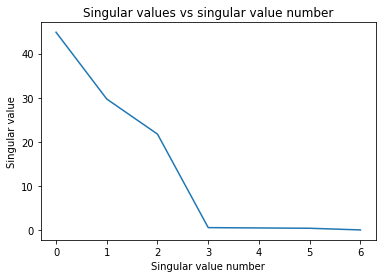

In [28]:
plt.plot(s)
plt.title('Singular values vs singular value number')
plt.ylabel('Singular value')
plt.xlabel('Singular value number')

You can clearly see that singular values 3 to 6 are close to 0. The inverse of these values must be set to 0. 

The code in the cell below creates the inverse singular value matrix, $D^+$. 0 is substituted for the inverse of the singular value if the ration of that singular value to the larges singular value is less than the cutoff specified. Execute this code and examine the result. 

In [29]:
def set_D(s, cutoff=0.01):
    '''Function creates inverse singular value matrix for 
    singular values greater than cutoff * largest singular value.'''
    d = []
    for sv in s:
        if(sv > cutoff * s[0]): d.append(1.0/sv)
        else: d.append(0.0)
    return np.diag(d)

D = set_D(s)
np.round(D,3)

array([[0.022, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.034, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.046, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.922, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

You can now compute the pseudo inverse, $A^\dagger$, of the model matrix. The model parameters are then estimated by multiplying the pseudo inverse by the label column. Execute the code in the cell below to perform these operations and examine the vector of model coefficients, $b$. 

In [30]:
MP_inverse = np.dot(V, np.dot(D, np.transpose(U)))
b = np.dot(MP_inverse, gaulton_male.childHeight)
b

array([ 0.16894753,  0.21188168, -1.39811803,  0.02815235, -0.12975097,
       -0.35786228,  0.36368155])

These coefficients are all near the same magnitude, which is encouraging. Models with a large numeric range of coefficient values tend to be less likely to generalize.  

### Evaluation of the Model

With the model coefficients computed, it is time to evaluate our model. Keep in mind that the best we hope to do with these data is predict the mean height.  

The code in the cell below does the following:   
- Computes the predicted values of adult child height. 
- Finds the mean and scale of the actual child height. These values are printed for reference later.  
- Scales the predicted values of height. Scaling can be a tricky business with SVD regression. In this case, the raw predicted values have zero mean and unit variance, and must be rescaled to the correct values.  
- Prints the first few rows of the actual and predicted height. 


Execute this code and examine the results. 

In [31]:
gaulton_male.loc[:,'predicted'] = np.dot(X, b)
height_scale = np.std(gaulton_male.childHeight)
height_mean = np.mean(gaulton_male.childHeight)
print('The mean actual height = {}   STD = {}\n'.format(height_mean, height_scale))
gaulton_male.loc[:,'predicted'] = np.multiply(height_scale, gaulton_male.loc[:,'predicted'])
gaulton_male.loc[:,'predicted'] = np.add(height_mean,  gaulton_male.loc[:,'predicted'])
gaulton_male.loc[:10,['childHeight','predicted']]

The mean actual height = 69.2340956340957   STD = 2.621175892507256



C:\Users\StevePC2\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


,childHeight,predicted
0,73.2,58.018065
4,73.5,61.290607
5,72.5,61.290607
8,71.0,63.614993
10,70.5,63.698016


From comparing the actual and predicted values it does not seem that our model is making very good predictions. To explore this problem further, execute the code in the code in the cell below to display the distribution of predicted and actual adult child heights.  

Mean of predicted values = 69.2340956340956
STD of predicted values = 2.9322562636498395



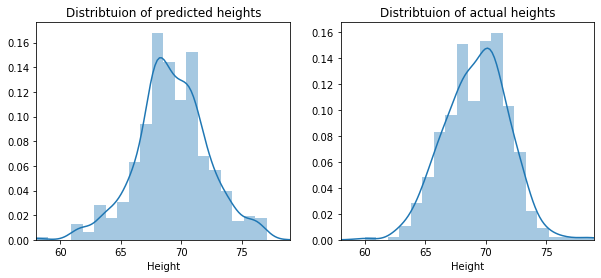

In [32]:
xmin = min(min(gaulton_male.predicted), min(gaulton_male.childHeight))
xmax = max(max(gaulton_male.predicted), max(gaulton_male.childHeight))
print('Mean of predicted values = {}'.format(np.mean(gaulton_male.predicted)))
print('STD of predicted values = {}\n'.format(np.std(gaulton_male.predicted)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.distplot(gaulton_male.predicted, bins=20, ax=ax[0])
ax[0].set_title('Distribtuion of predicted heights')
ax[0].set_xlabel('Height')
ax[0].set_xlim(xmin,xmax)
sns.distplot(gaulton_male.childHeight, bins=20, ax=ax[1])
ax[1].set_title('Distribtuion of actual heights')
ax[1].set_xlabel('Height')
_=ax[1].set_xlim(xmin,xmax)

To compare these distributions, notice the following:   

- The mean of the predicted and actual values are identical.
- The standard deviation of the mean and predicted values are different. 
- The shape of the distributions is different. In particular, notice the tails and skew of each distribution. 

Now, the question is how do the residuals of the model behave? To find out, execute the code in the cell below and examine the plots. 

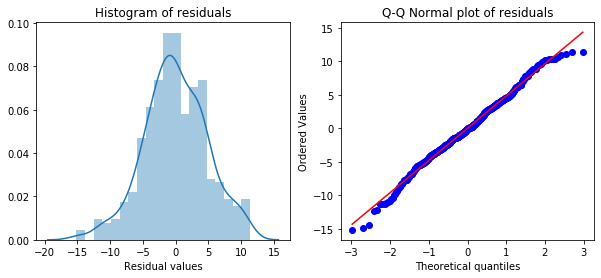

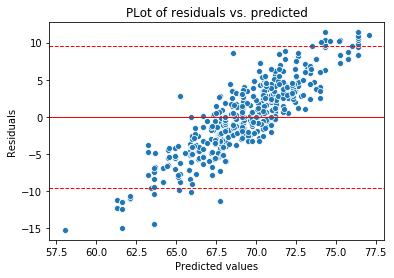

In [33]:
def plot_resid_dist(resids):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ## Plot a histogram
    sns.distplot(resids, bins=20, ax=ax[0])
    ax[0].set_title('Histogram of residuals')
    ax[0].set_xlabel('Residual values')
    ## Plot the Q-Q Normal plot
    ss.probplot(resids, plot = ax[1])
    ax[1].set_title('Q-Q Normal plot of residuals')
    plt.show()

def residual_plot(df):
    RMSE = np.std(df.resids)
    sns.scatterplot(x='predicted', y='resids', data=df)
    plt.axhline(0.0, color='red', linewidth=1.0)
    plt.axhline(2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.axhline(-2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.title('PLot of residuals vs. predicted')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.show()  

gaulton_male.loc[:,'resids'] = np.subtract(gaulton_male.loc[:,'predicted'],gaulton_male.loc[:,'childHeight'])
plot_resid_dist(gaulton_male.loc[:,'resids'])
residual_plot(gaulton_male)

While the residuals are approximately Normally distributed, they are strongly heteroscedastic. The residuals trend strongly with predicted value, indicating the model is just predicting regression to the mean. This is actually the expected result in this case. 

Finally, you can compute a few metrics by executing the code in the cell below. 

In [34]:
SSR = np.sum(np.square(gaulton_male.loc[:,'resids']))
SST = np.sum(np.square(gaulton_male.loc[:,'childHeight'] - height_mean))

print('SSR: {}'.format(SSR))
print('SST: {}'.format(SST))

R2 = 1.0 - (SSR / SST)

print('R-squared = {}'.format(R2))


SSR: 11056.685338186537
SST: 3304.740831600832
R-squared = -2.3457042175469556


These metrics are quite unusual! How can you interpret them? In summary, they indicate that the model explains nothing. We would be better off just using the mean of height as the prediction. This approach would at least give an $R^2$ value of 0. 

#### Copyright 2017, 2018, 2019, 2020 Stephen F Elston. All rights reserved. 